Uses SQLite to access the CIA World Factbook to visualize demographic trends in different countries. 

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('factbook.db')

q1 = "select * from sqlite_master where type='table';"
pd.read_sql_query(q1, conn)

type             name         tbl_name  rootpage  \
0  table  sqlite_sequence  sqlite_sequence         3   
1  table            facts            facts        47   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...

In [2]:
q = "select * from facts limit 5"
first5_facts = pd.read_sql_query(q, conn)
first5_facts

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46

In [3]:
q = "select min(population), max(population), min(population_growth), max(population_growth) from facts"
pd.read_sql_query(q, conn)

min(population)  max(population)  min(population_growth)  \
0                0       7256490011                     0.0   

   max(population_growth)  
0                    4.02

In [17]:
q = "select name from facts where population == (select min(population) from facts)"
pd.read_sql_query(q, conn)

q2= "select name from facts where population == (select max(population) from facts)"
pd.read_sql_query(q2, conn)

name
0  World

Antarctica has a population of 0.
The World has a population of 7256490011.
Neither are countries.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc80d382cc0>,
      dtype=object)

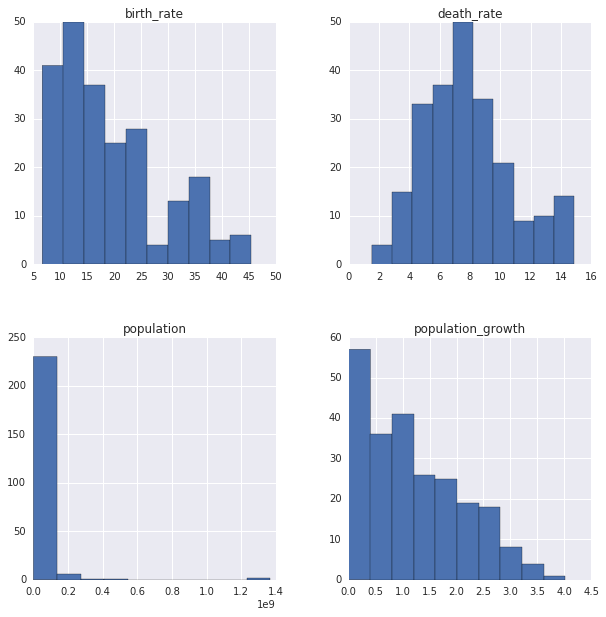

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

q = "select population, population_growth, birth_rate, death_rate from facts where population != (select max(population) from facts) and population != (select min(population) from facts)"
pd.read_sql_query(q, conn).hist(ax=ax)

In [21]:
q = "select name, cast(population as float)/cast(area_land as float) density from facts order by density desc limit 10"
pd.read_sql_query(q, conn)



name       density
0       Macau  21168.964286
1      Monaco  15267.500000
2   Singapore   8259.784571
3   Hong Kong   6655.271202
4  Gaza Strip   5191.819444
5   Gibraltar   4876.333333
6     Bahrain   1771.859211
7    Maldives   1319.640940
8       Malta   1310.015823
9     Bermuda   1299.925926

The countries with the highest population densities are Macau, Monaco, Singapore, Hong Kong, the Gaza Strip, Gibraltar, Bahrain, the Maldives, Malta, and Bermuda.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc80c8fe3c8>],
      dtype=object)

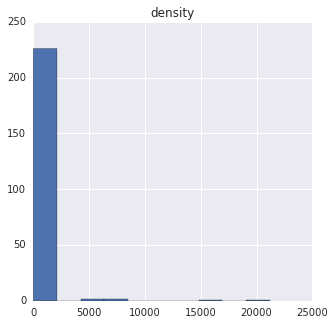

In [29]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
q = "select name, cast(population as float)/cast(area_land as float) density from facts where population != (select max(population) from facts) and population != (select min(population) from facts)"
pd.read_sql_query(q, conn).hist(ax=ax)

In [31]:
q = "select name, cast(area_water as float)/cast(area_land as float) water_land_ratio from facts where name != 'Antarctica' and name != 'World' order by water_land_ratio desc"
pd.read_sql_query(q, conn)

name  water_land_ratio
0                   British Indian Ocean Territory        905.666667
1                                   Virgin Islands          4.520231
2                                      Puerto Rico          0.554791
3                                     Bahamas, The          0.386613
4                                    Guinea-Bissau          0.284673
5                                           Malawi          0.259396
6                                      Netherlands          0.225710
7                                           Uganda          0.222922
8                                          Eritrea          0.164356
9                                          Liberia          0.156240
10                                      Bangladesh          0.140509
11                                     Gambia, The          0.116601
12                                          Taiwan          0.115313
13                                         Finland          0.112996
14                                           India          0.105634
15                                          Canada          0.098000
16                                          Sweden          0.097384
17                                        Colombia          0.096476
18                                          Brunei          0.094967
19                                          Guyana          0.092050
20                                French Polynesia          0.088842
21                                       Nicaragua          0.086507
22                                         Burundi          0.083723
23                                            Iran          0.076130
24                                   United States          0.072551
25                                        Tanzania          0.069429
26                                         Vietnam          0.068178
27                                          Rwanda          0.067699
28                                         Estonia          0.067000
29                                          Norway          0.064151
..                                             ...               ...
229  Saint Helena, Ascension, and Tristan da Cunha          0.000000
230       South Georgia and South Sandwich Islands          0.000000
231                       Turks and Caicos Islands          0.000000
232                                 American Samoa          0.000000
233                                           Guam          0.000000
234                                 Navassa Island          0.000000
235                       Northern Mariana Islands          0.000000
236                                    Wake Island          0.000000
237                                     Gaza Strip          0.000000
238                                Paracel Islands          0.000000
239                                Spratly Islands          0.000000
240                                 Western Sahara          0.000000
241                                       Ethiopia               NaN
242                                    New Zealand               NaN
243                                    South Sudan               NaN
244                                          Sudan               NaN
245                        Holy See (Vatican City)               NaN
246                                 European Union               NaN
247                                      Greenland               NaN
248            French Southern and Antarctic Lands               NaN
249                               Saint Barthelemy               NaN
250                                   Saint Martin               NaN
251                                       Akrotiri               NaN
252                                       Dhekelia               NaN
253  United States Pacific Island Wildlife Refuges               NaN
254                                   Arctic Ocean               NaN
255                                 Atlantic

The five countries with the highest ratios of water to land are the British Indian Ocean Territory, the Virgin Islands, Puerto Rico, the Bahamas, and Guinea-Bissau. Only the British Indian